In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

## Logistic regressions

Generate some sample data

In [3]:
failed = np.random.uniform(1, 3, 12)
passed = np.random.uniform(7, 10, 8)

all_times = np.concatenate([failed, passed])

result = np.array([0] * 12 + [1] * 8)

Plot the data

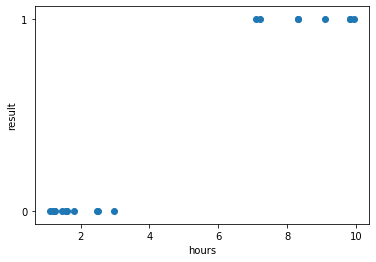

In [7]:
plt.scatter(all_times, result)
plt.xlabel('hours')
plt.ylabel('result')
plt.yticks([0, 1])
plt.show()
    

Let's generate more realistic data

In [17]:
failed = np.random.uniform(1, 6, 9)
passed = np.random.uniform(4, 10, 12)

all_times = np.concatenate([failed, passed])

result = np.array([0] * 12 + [1] * 9)

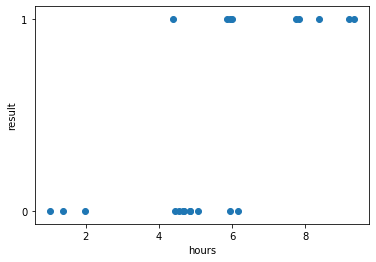

In [18]:
plt.scatter(all_times, result)
plt.xlabel('hours')
plt.ylabel('result')
plt.yticks([0, 1])
plt.show()

Let's make sigmoid function

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Lets plot some data

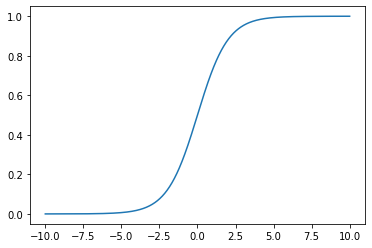

In [22]:
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [28]:
def generate_output(z):
    return int(sigmoid(z) >= 0.5)

In [24]:
for x in np.arange(-2, 3):
    print(x, sigmoid(x), generate_output(x))

-2 0.11920292202211755 0
-1 0.2689414213699951 0
0 0.5 1
1 0.7310585786300049 1
2 0.8807970779778823 1


Let's create logistic function

In [33]:
def logistic_function(x, a, b):
    z = a * x + b
    return sigmoid(z)

In [34]:
print(logistic_function(0, 1, 0)) # should return 0.5

0.5


In [35]:
print(logistic_function(np.arange(-2, 5), a=-2, b=3))

[0.99908895 0.99330715 0.95257413 0.73105858 0.26894142 0.04742587
 0.00669285]


Let's try out different values of $a$ and $b$, just to get a feel of what we need to do

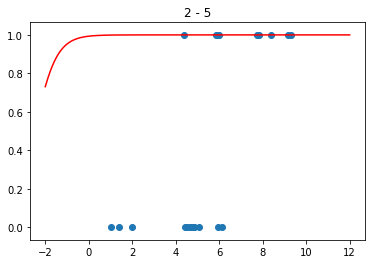

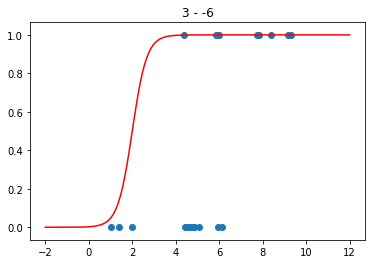

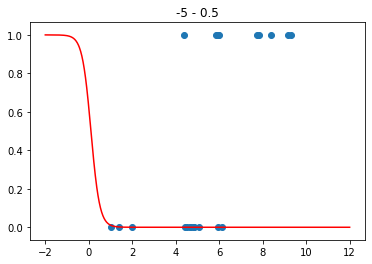

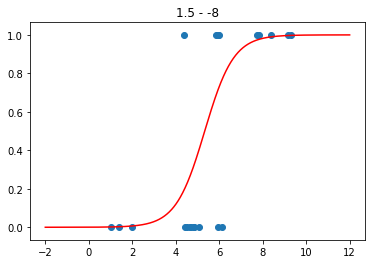

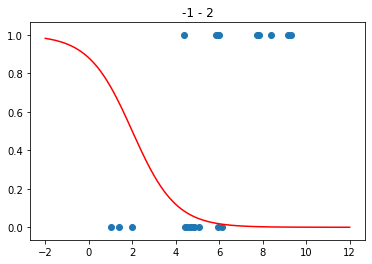

In [40]:
def plot_prediction_with_sigmoid(a, b, x, y, title=''):
    plt.scatter(x, y)
    logistic_x_values = np.linspace(-2, 12, 1000)
    logistic_y_values = logistic_function(logistic_x_values, a, b)
    plt.plot(logistic_x_values, logistic_y_values, color='red')
    plt.title(title)
    plt.show()

for a, b in [[2, 5], [3, -6], [-5, 0.5], [1.5, -8], [-1, 2]]:
    plot_prediction_with_sigmoid(a, b, all_times, result, '{} - {}'.format(a, b))
    

In [41]:
def error_0(x):
    return -np.log(1 - x)

def error_1(x):
    return-np.log(x)

/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/ivan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


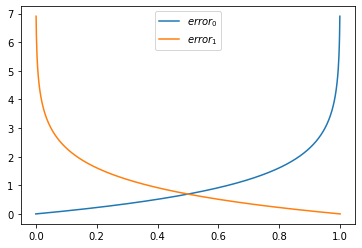

In [42]:
sigmoid_valies = np.linspace(0, 1, 1000)
plt.plot(sigmoid_valies, error_0(sigmoid_valies), label='$error_0$')
plt.plot(sigmoid_valies, error_1(sigmoid_valies), label='$error_1$')
plt.legend()
plt.show()

In [43]:
def get_error(z, y):
    sigmoid_result = sigmoid(z)
    
    if y == 0:
        return error_0(sigmoid_result)
    return error_1(sigmoid_result)

Calculate cost function

In [44]:
def compute_error_function(a, b, x, y):
    z = a * x + b
    return get_error(z, y)

In [46]:
def cost_function(a, b, data_x, data_y):
    errors = []
    
    for (x, y) in zip(data_x, data_y):
        errors.append(compute_error_function(a, b, x, y))
    
    return np.sum(errors)

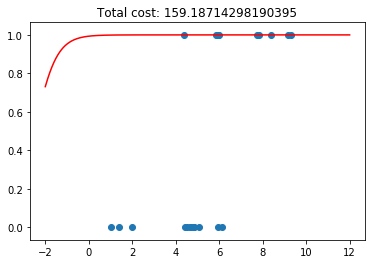

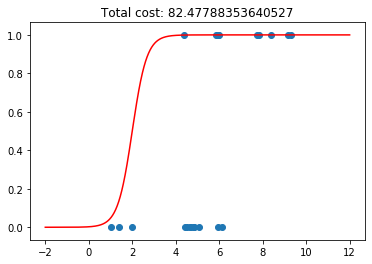

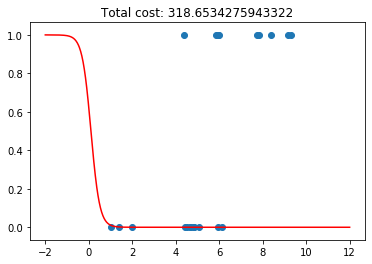

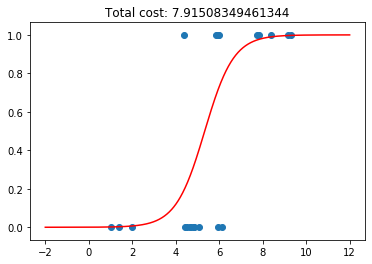

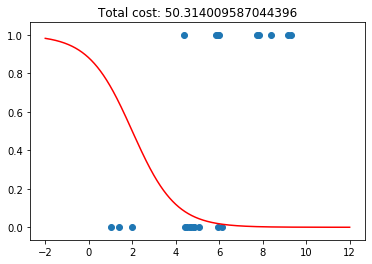

In [53]:
for a, b in [[2, 5], [3, -6], [-5, 0.5], [1.5, -8], [-1, 2]]:
    total_cost = cost_function(a, b, all_times, result)
    plot_prediction_with_sigmoid(a, b, all_times, result, "Total cost: {}".format(total_cost))

Gradient ascent

In [54]:
def gradient_ascent(a, b, data_x, data_y, learning_rate):
    y_prediction = sigmoid(a * data_x + b)
    errors = data_y - y_prediction
    a_gradient = np.sum(data_x * errors)
    b_gradient = np.sum(errors)
    
    new_a = a + learning_rate * a_gradient
    new_b = b + learning_rate * b_gradient
    
    return new_a, new_b

In [58]:
def train_model(data_x, data_y):
    a, b = 0, 0
    learning_rate = 0.01
    
    for step in range(5001):
        a, b = gradient_ascent(a, b, all_times, result, learning_rate)
    
    return a, b

In [59]:
a, b = train_model(all_times, result)

In [60]:
print("a = {}; b = {}".format(a, b))

a = 1.5349666359732832; b = -8.892397148835517


In [62]:
model = LogisticRegression(C=1e9)
model.fit(all_times.reshape(-1, 1), result)

print('a = {}; b = {}'.format(model.coef_[0,0], model.intercept_[0]))

a = 1.58189509743437; b = -9.157201835394519


/home/ivan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test our model

In [63]:
def predict(a, b, x_data):
    return generate_output(a * x_data + b)

In [64]:
result_predicted = np.array([predict(a, b, time) for time in all_times])
print('Predicted: {}'.format(result_predicted))
print('Actual: {}'.format(result))


Predicted: [0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1]
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


In [67]:
def calculate_accuracy(predicted, actual):
    correct = predicted == actual
    return correct.sum() / len(correct)

In [68]:
calculate_accuracy(result_predicted, result)

0.8571428571428571

References:
* https://softuni.bg/trainings/2315/data-science-june-2019#lesson-11192
* https://en.wikipedia.org/wiki/Logistic_regression
* https://en.wikipedia.org/wiki/Sigmoid_function